# Utilizando o dataset fetch_california_housing do sklearn (from sklearn.datasets import fetch_california_housing)

### a. Descreva as variáveis encontradas no dataset (colunas).

Cada etapa deste projeto está baseado na metodologia CRISP-DM.

Etapa 1: Assumindo que a etapa de Business understand já foi feita, começaremos com Data understanding.

Importação das bibliotecas necessárias para analisar/transformar os dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
fch_data = fetch_california_housing()
fch_df = pd.DataFrame(fch_data.data, columns = fch_data.feature_names)

# Criando a coluna "MedianHouseValue" que será a variável target.

fch_df['MedianHouseValue'] = fch_data.target
fch_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
# Descrição do dataset 

print(fch_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
# Tipo de dados

fch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MedInc            20640 non-null  float64
 1   HouseAge          20640 non-null  float64
 2   AveRooms          20640 non-null  float64
 3   AveBedrms         20640 non-null  float64
 4   Population        20640 non-null  float64
 5   AveOccup          20640 non-null  float64
 6   Latitude          20640 non-null  float64
 7   Longitude         20640 non-null  float64
 8   MedianHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
# Verificando se há dados duplicados.

fch_df[fch_df.duplicated()]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue


Nos blocos acima podemos ver o nome, a descrição das variáveis e o tipo delas (neste caso todas são do tipo numéricas(float)). Consoante a isso, também observa-se que na base não há dados faltantes e nem duplicados, logo, não há necessidade de um tratamento específico para estes tipos de dados.

In [ ]:
fch_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


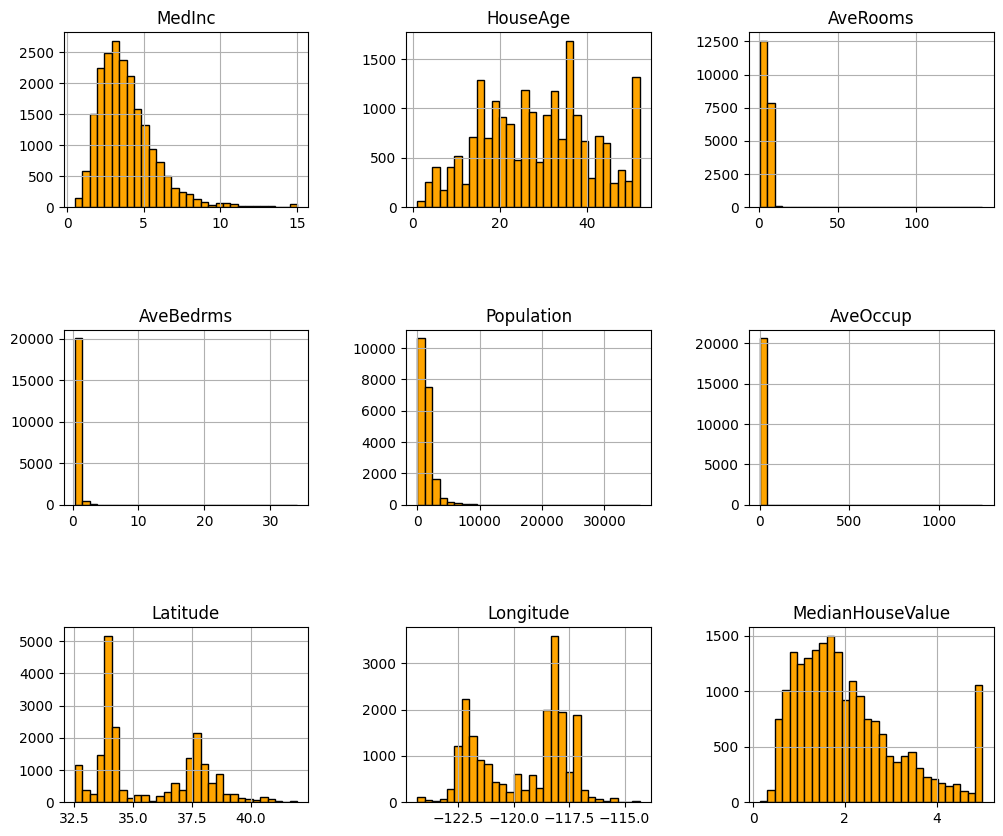

In [ ]:
# Análise das variáveis por meio de histogramas.

fch_df.hist(figsize=(12, 10), bins=30, edgecolor="black",color='orange')
plt.subplots_adjust(hspace=0.7, wspace=0.4)

A partir da análise dos histogramas, vemos que a variável "MedInc" se aproxima mais de uma distribuição de cauda longa, i.e., alguns indivíduos recebem um alto salário, mas no geral os salários estão mais distribuídos como uma normal. 

A variável target (MedianHouseValue) aparenta ser uma distribuição de cauda longa, porém, observa-se que ela não decresce assintoticamente quando chega próximo de 6, ou seja, dá a entender que este valor é estabelecido como um limite superior para o valor da mediana das casas.

<AxesSubplot: >

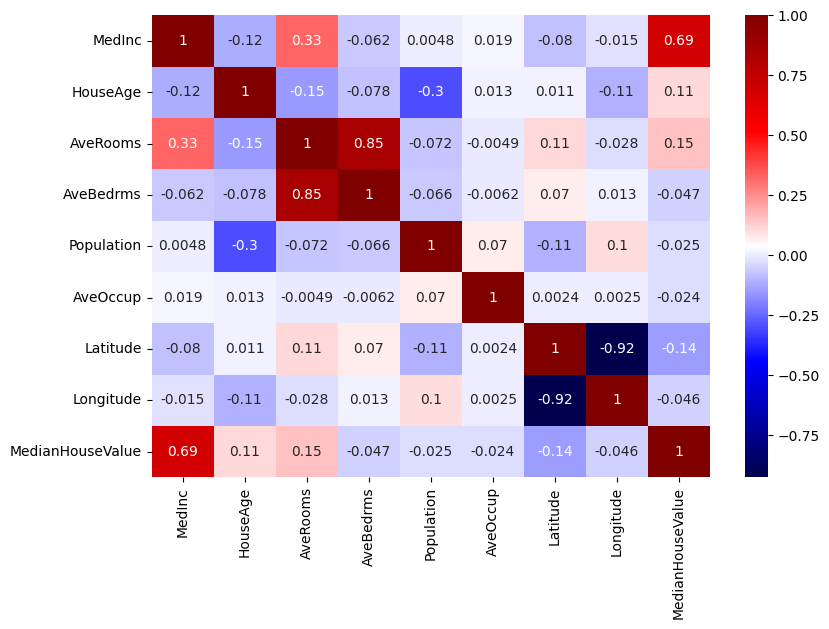

In [ ]:
# Mapa de calor(heatmap) para análise das correlações.

plt.figure(figsize=(9,6))
sns.heatmap(fch_df.corr(), annot=True,cmap='seismic')

Etapa 2: Data preparation

### b. Separe o dataset em treino (80%) e teste (20%) e realize os pré-processamentos necessários.

In [ ]:
# Atribuindo a variável target.

X = fch_df.drop(columns=['MedianHouseValue'])
y = fch_df['MedianHouseValue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size= 0.8,random_state=2)

# Escalonamento

stdscaler = StandardScaler()
stdscaler.fit(X_train)
X_train_stdscaler = stdscaler.transform(X_train)
X_test_stdscaler = stdscaler.transform(X_test)


Etapa 3: Modeling

### c. Crie um modelo de regressão linear.

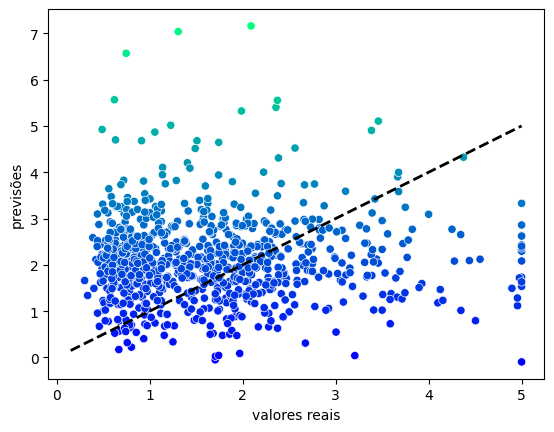

In [ ]:
# Aplicação do modelo
modelo_lr = LinearRegression()
modelo_lr.fit(X_train_stdscaler, y_train)
y_test_pred = modelo_lr.predict(X_test_stdscaler)
y_train_pred = modelo_lr.predict(X_train_stdscaler)

df_lr = pd.DataFrame()
df_lr['valores reais'] = pd.Series(y_test)
df_lr['previsões'] = pd.Series(y_test_pred)

# Gráfico

sns.scatterplot(data=df_lr, x='valores reais', y='previsões', hue='previsões', palette='winter', legend=False)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.show()

Etapa 4: Evaluation

### d. Mostre o desempenho do seu modelo através do RMSE, MAE e R2.

In [ ]:
# Calculando as métricas.

rmse = mean_squared_error(y_test, y_test_pred,squared=False)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")

RMSE: 0.73
MAE: 0.54
R2: 0.60


Podemos observar que, apesar de os erros estarem relativamente altos, o percentual da variância dos dados, (calculado em R2), é aceitável, sendo assim não há necessidade de retomar a etapa de business understand<->data understand. Todavia,  aplicar as sugestões abaixo pode  trazer uma melhor performance do modelo. Havendo  melhoria das métricas seguirá o deployment.

### e. Quais suas sugestões para melhorar o modelo?

Como vimos, algumas distribuições são do tipo cauda longa, portanto, seria interessante tratá-las com a aplicação do log. Um outro ponto é tentar entender melhor o negócio para saber lidar com alguns valores na variável target, já que temos casas com medianas > 6 (aproximadamente), mas que foram estabelecidas como 6 (aproximadamente). Em outras palavras, devemos pensar se esses valores são ou não outliers, e para isso segue a sugestão de retomar a etapa Business Understand -><- Data Understand.

Vejamos a implementação do log10, já que a outra sugestão requer retornar para as etapas iniciais e não será analisado neste projeto. Vamos repetir sequencialmente a mesma ideia a partir da etapa Data Preparation.

In [ ]:
# Aplicação do log10.

fch_df['MedInc'] = np.log10(fch_df['MedInc'])
fch_df['Population'] = np.log10(fch_df['Population'])
fch_df['MedianHouseValue'] = np.log10(fch_df['MedianHouseValue'])
fch_df['AveRooms'] = np.log10(fch_df['AveRooms'])
fch_df['AveBedrms'] = np.log10(fch_df['AveBedrms'])

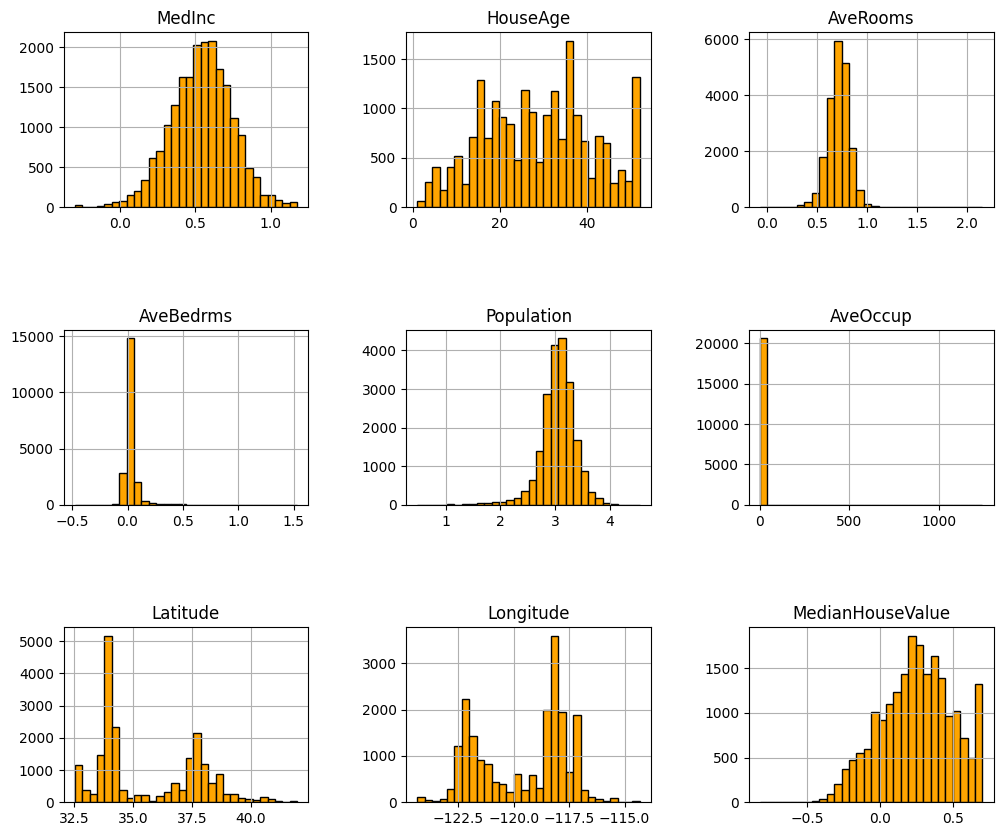

In [ ]:
# Análise dos histogramas depois da aplicação do log10.

fch_df.hist(figsize=(12, 10), bins=30, edgecolor="black",color='orange')
plt.subplots_adjust(hspace=0.7, wspace=0.4)

Observa-se uma boa normalização em MedInc e uma pequena normalização (bem estreita) em AveRooms e AveBedrms e um pouco mais normalizada em Population.

In [ ]:
# Separando em treino e teste.

X = fch_df.drop(columns=['MedianHouseValue'])
y = fch_df['MedianHouseValue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size= 0.8,random_state=2)

stdscaler = StandardScaler()
stdscaler.fit(X_train)
X_train_stdscaler = stdscaler.transform(X_train)
X_test_stdscaler = stdscaler.transform(X_test)

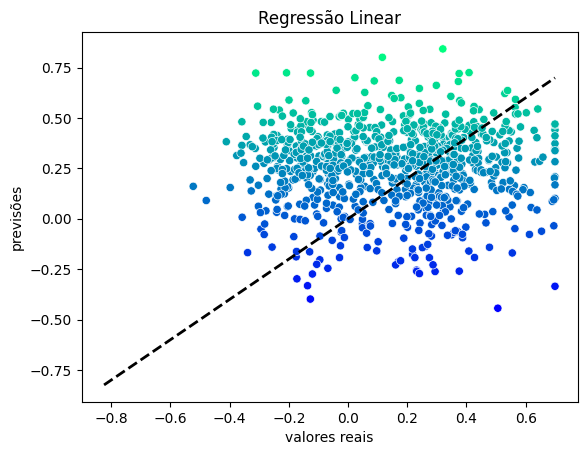

In [ ]:
# Fazendo a regressão linear.

modelo_lr = LinearRegression()
modelo_lr.fit(X_train_stdscaler, y_train)
y_test_pred = modelo_lr.predict(X_test_stdscaler)
y_train_pred = modelo_lr.predict(X_train_stdscaler)

df_lr = pd.DataFrame()
df_lr['valores reais'] = pd.Series(y_test)
df_lr['previsões'] = pd.Series(y_test_pred)

sns.scatterplot(data=df_lr, x='valores reais', y='previsões', hue='previsões', palette='winter', legend=False)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.title('Regressão Linear')
plt.show()

In [ ]:
# Desempenho do modelo com as implementações.

rmse = mean_squared_error(y_test, y_test_pred,squared=False)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")

RMSE: 0.15
MAE: 0.11
R2: 0.63


OBS: Aqui foi escolhido o log10 pois a aplicação do log apresentou resultados um pouco piores.  Com esses novos resultados, podemos notar uma melhora substancial nos resultados, assim podemos seguir para a etapa de Deployment.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=15f2e087-231c-4a94-884b-e01188661beb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>